# Use all the data!
## Using SQL (sort of) to make efficient queries

Last semester I had some of my students do a project based on the Buzzfeed news article "[They Plsyed Dominoes Outside Their Apartment for Years, then the Police Started Showing Up](https://www.buzzfeednews.com/article/lamvo/gentrification-complaints-311-new-york)". Part of this was retrieving interesting data from the [NYC OpenData](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9) portal. There is a lot of 311 data for New York City, as you might expect, so just downloading it all wasn't really an option, so we needed to make specific requests to the API.

The [API](https://dev.socrata.com/) uses a query language which is similar to SQL (in fact they call it SoQL), so doing exploratory data analysis through the API uses the same principles as one might expect from SQL.

This tutorial will cover
- Using the query language to do exploratory data analysis to study city-wide trends that would possibly use all 21 Million rows of the data.
- Using Seaborn in Python to visualise this data.

I am expecting that you are somewhat familiar with Python, and somewhat familiar with SQL to do this, but I will try to keep things as introductory as possible.

First, load all the packages!

In [77]:
import pandas as pd  #for storing and manipulating data locally
import datetime as dt # for dealing with time variables in the data
import matplotlib.pyplot as plt # for visualising the data
import seaborn as sns # for visualising their data

Okay, that wasn't all that many packages.

Second, let's make a function that turns our querys into urls for sending to the API. This appends the query to the endpoint url of the api. We are going to use the [NYC 311 API](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9), the point of the `q2url` is so that we don't need to type the endpoint every time we want to make a query. This also makes a queries a bit easier to read.

In [3]:
def q2url(string):
    """This function changes a query as a string to a url that will communicate that query to the API."""
    url = 'https://data.cityofnewyork.us/resource/fhrw-4uyv.csv' + "?"+string
    return url

The documentation for how to make queries [can be found here](https://dev.socrata.com/docs/queries/), but if you know some SQL, you can do what I do... make a SQL query and then stumble around until you get one that actually works!

Below is an example of how you would make a simple query for all the requests from the date 01 April 2019, as well as the start of the data, so that you can get a sense for what is in the data.

In [42]:
aprilfools = pd.read_csv(q2url("created_date='2019-04-01T00:00:00.000'"))

This is similar to the SQL query 
```
SELECT *
WHERE created_data = '2019-04-01T00:00:00.000';
```
Notice that dates are strings in the ISO datetime format.

In [36]:
aprilfools.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location_city,location,location_address,location_zip,location_state
0,42111375,2019-04-01T00:00:00.000,2019-04-19T00:00:00.000,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10011,38 WEST 14 STREET,...,NaN,NaN,NaN,40.736556,-73.994952,NaN,POINT (-73.994951805509 40.736556453093),NaN,NaN,NaN
1,42110763,2019-04-01T00:00:00.000,2019-04-18T00:00:00.000,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,3+ Family Mixed Use Building,10030,203 WEST 138 STREET,...,NaN,NaN,NaN,40.817358,-73.942589,NaN,POINT (-73.942588802545 40.817358293068),NaN,NaN,NaN
2,42110095,2019-04-01T00:00:00.000,2019-04-22T00:00:00.000,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10012,68 WEST 3 STREET,...,NaN,NaN,NaN,40.729283,-73.998358,NaN,POINT (-73.998358343256 40.729282953187),NaN,NaN,NaN
3,42110092,2019-04-01T00:00:00.000,2019-04-01T00:00:00.000,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10011,38 WEST 14 STREET,...,NaN,NaN,NaN,40.736417,-73.995735,NaN,POINT (-73.995734843921 40.736416502357),NaN,NaN,NaN
4,42110041,2019-04-01T00:00:00.000,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10451,610 EXTERIOR STREET,...,NaN,NaN,NaN,40.821743,-73.930861,NaN,POINT (-73.930860669189 40.821743407536),NaN,NaN,NaN


The documentation of this data is pretty good, but take a trip with me for a second... 

In [44]:
print(aprilfools.shape)
print(aprilfools.columns)
print(aprilfools.agency_name.unique())

(129, 45)
Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'facility_type', 'status', 'due_date',
       'resolution_description', 'resolution_action_updated_date',
       'community_board', 'bbl', 'borough', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'open_data_channel_type',
       'park_facility_name', 'park_borough', 'vehicle_type',
       'taxi_company_borough', 'taxi_pick_up_location', 'bridge_highway_name',
       'bridge_highway_direction', 'road_ramp', 'bridge_highway_segment',
       'latitude', 'longitude', 'location_city', 'location',
       'location_address', 'location_zip', 'location_state'],
      dtype='object')
['Department of Health and Mental Hygiene']


Okay, that is a little weird, why do we only have DOHMH as an agency? Is April Fools day a problem for mental health but not for sanitation or crime?

OR.... because the query is for the exact time of midnight, and presumably, DOHMH only records the date, and not time. 

So this leads us to perhaps the biggest difference between this API and SQL... which is the transformation functions. Below we use `date_trunc_ymd` to just get the date from `created_date`. In actual SQL you would use `TRUNC` and `FORMAT` functions to accomplish this.

In [46]:
aprilfools = pd.read_csv(q2url("&$where=date_trunc_ymd(created_date)='2019-04-01T00:00:00.000'"))

In [230]:
print(aprilfools.shape)
print(aprilfools.agency.unique())

(1000, 45)
['DSNY' 'DOT' 'DOHMH' 'NYPD' 'TLC' 'DPR' 'DEP' 'DOF' 'HPD' 'ACS' 'DCAS'
 'DOB' 'DHS' 'DFTA' 'HRA' 'DCA']


That looks a lot better. I will note that the API throttles the number of rows returned at 1000 by default, you can raise this limit to 50,000 and page through data, but as there are 21 million data points, a lot of my previous kernel was dedicated to getting around this limit. 

This kernel we want to use city-wide trends though, so rather than selecting for a specific neighborhood, we will want to use agregation functions to produce the data we will want to do is figure out how many deparments there actually are, and how many requests each of them have gotten since the beginning of the dataset.

So we are going to use a `GROUP BY` call. The format here is very similar to actual SQL, which would be
```
SELECT agency, COUNT(unique_key) AS total_calls
GROUP BY agency;
```
The function `COUNT` is an aggregator function, so it is used with `GROUP BY` to count the number of rows which have a given `agency`. I have translated this and submitted the query below.

In [219]:
query = """$select=agency,count(unique_key)%20as%20total_calls
            &$group=agency
        """.replace(" ","").replace("\n","")
print(query)
agency_requests = pd.read_csv(q2url(query))

$select=agency,count(unique_key)%20AS%20total_calls&$group=agency


Some minutae: I've set of the query so it is more readable, the calls of the `replace` method at the end are to strip the query of white space `" "` and line breaks `"\n"`. Alsoe `%20` is the more robust way to include white space in these API calls.

Let's take a look at what we have.

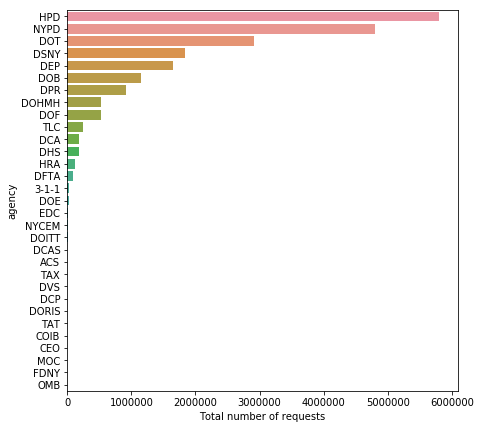

In [221]:
# Enlarge the image
g, ax = plt.subplots(figsize=(7, 7))
# 
# Make a bar plot 
g = sns.barplot(data = agency_requests.sort_values("total_calls", ascending=False),
                y = "agency",
                x = "total_calls")
g = g.set_xlabel("Total number of requests")

Great, now let's record the the most common agencies in the list `departments` below, I've also made a list of cities, but most of them aren't really part of New York. 

In [197]:
departments = ['HPD', 'NYPD','DOT',  'DSNY', 'DEP', 'DOB','DPR',
               'DOHMH','DOF', 'TLC', 'DCA', 'DHS', 'HRA']
cities = ['BROOKLYN', 'BRONX', 'NEW YORK', 'JACKSON HEIGHTS', 'FLUSHING',
       'STATEN ISLAND', 'WOODSIDE', 'SOUTH RICHMOND HILL', 'OZONE PARK',
       'WHITESTONE', 'CORONA', 'WOODHAVEN', 'LITTLE NECK',
       'EAST ELMHURST', 'JAMAICA', 'ASTORIA', 'HOLLIS', 'HOWARD BEACH',
       'FOREST HILLS', 'RIDGEWOOD', 'SUNNYSIDE', 'ARVERNE',
       'OAKLAND GARDENS', 'COLLEGE POINT', 'SOUTH OZONE PARK',
       'RICHMOND HILL', 'SPRINGFIELD GARDENS', 'MIDDLE VILLAGE',
       'ROCKAWAY PARK', 'ELMHURST', 'QUEENS VILLAGE', 'MASPETH',
       'FAR ROCKAWAY', 'ROSEDALE', 'SAINT ALBANS', 'FRESH MEADOWS',
       'REGO PARK']
#colors = {'NYPD':0, 'DOT':1, 'TLC':2, 'DSNY':3, 'DPR':4, 'DOHMH':5, 'DHS':6}

The Departments above are
- HPD - Housing Preservation and Development
- NYPD - New York Police Department
- DOT - Department of Transit
- DSNY - Department of Sanatation
- DEP - Department of Enviromental Protection
- DOB - Department of Buildings
- DPR - Department of Parks and Recreation
- DOHMH - Department of Health and Mental Hygiene
- DOF - Department of Finance
- TLC - Taxi and Limosine Commission
- DCA - Department of Consumer Affairs
- DHS - Department of Homeless Services (This DHS is about 10 years older than the other one.)




## Calls over time by department

We shall try to analyse the amount of calls routed to the different agencies over time since the start of the dataset. So now wee need to group by agency and the mongth that something happens. Again, the format for the trunctation call is a little different for the SQL version
```
SELECT agency, DATE_TRUNC("month", created_date) AS month, COUNT(unique_key) AS total_calls
GROUP BY agency, month;
```

In [234]:
qq = """$select=agency,date_trunc_ym(created_date)%20AS%20month,COUNT(unique_key)%20AS%20total_calls
        &$group=agency,month
        &$limit=10 000""".replace("\n", "").replace(" ","")
#
Over_months = pd.read_csv(q2url(qq))

To plot the time series, we need to turn the dates into `dt.datetime` datatypes.

In [236]:
Over_months.month = pd.to_datetime(Over_months.month)
Over_months_agencies = Over_months[Over_months.agency.isin(departments)]

Below, we will use a facet wrap in Seaborn to compare the different times series. We set this up by initialising a `FacetGrid` obeject, and then `map`ping the `lineplot` function over the given categorical variable (in this case `agency`).

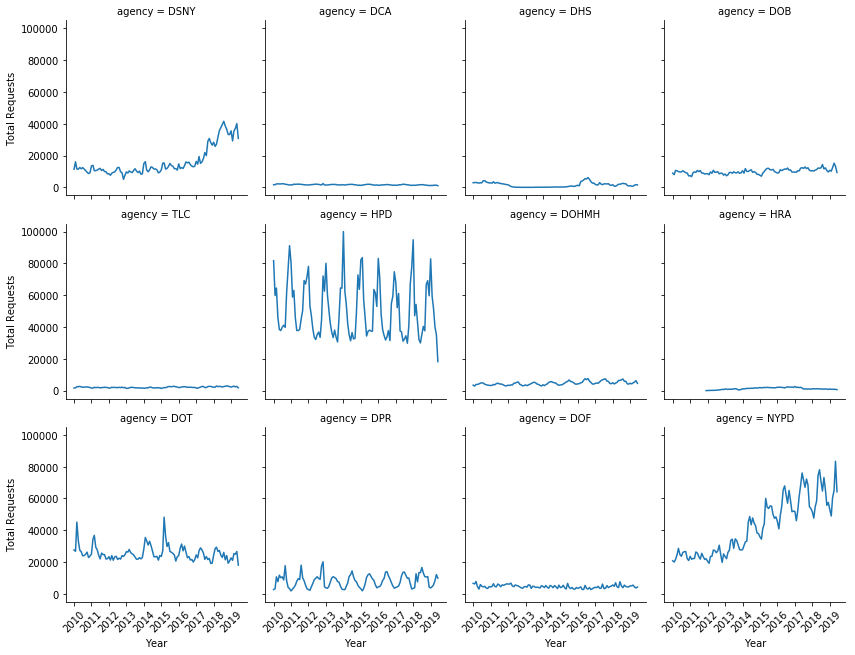

In [237]:
# Initialise facet grid
g = sns.FacetGrid(Over_months_agencies,
                 col = "agency", col_wrap=4) 
#
# Map lineplot
g = g.map(sns.lineplot,
                 "month", 
                 "total_calls" )
g = g.set_xticklabels(rotation = 45)
#
# Relabel the axes
g = g.set_ylabels("Total Requests")
g = g.set_xlabels("Year")

Some things that to notice:

- The only ones of these which seem to be steadily rising are Department of Sanitation, and the Police Department, the rest are relatively consistent throughout the time period.
- Most agencies have seasonal fluxuations (this is why many of them look like waves) This has a lot of implications for how you might subsample this data: calls are different in January than in July, so sampling needs to take this into account

## Number of calls according to Agency and Burrow

Finally, to explore this variables, lets restrict ourselves the 4 most common agencies, and we will use a facet grid to compare them accross different burrows of the city.

The first thing to do is to make the API, qhich is vry similar to the previous one, but to make sure we do not go over the limit of number of rows, we shall make a different call for each comnimation of `city` and `agency`. To do this we use a for loop and the `format` method on the query string to insert the appropriate agency and city.

In [239]:
city_agency = pd.DataFrame({'city':[], 'agency':[], 'month':[], 'total_calls':[]})

for agency in ('HPD', 'NYPD','DOT',  'DSNY'):
    for city in ("NEW%20YORK", "BRONX", "BROOKLYN", "STATEN%20ISLAND"):
        qq = """$select=city,agency,date_trunc_ym(created_date)%20AS%20month,COUNT(unique_key)%20AS%20total_calls
                &$where=agency='{}'&city='{}'
                &$group=city,agency,month
                &$limit=10000""".format(agency,city).replace('\n','').replace(" ","")

        city_agency = city_agency.append(pd.read_csv(q2url(qq)))

In [240]:
#format the month column as a datetime object
city_agency.month = pd.to_datetime(city_agency.month)

Now we shall set up a facet grid which has  the city as the columns and the agency as the rows. This way, if you want to compare how many calls to a given agency there has been across the different cities, you can simply scan across a row.

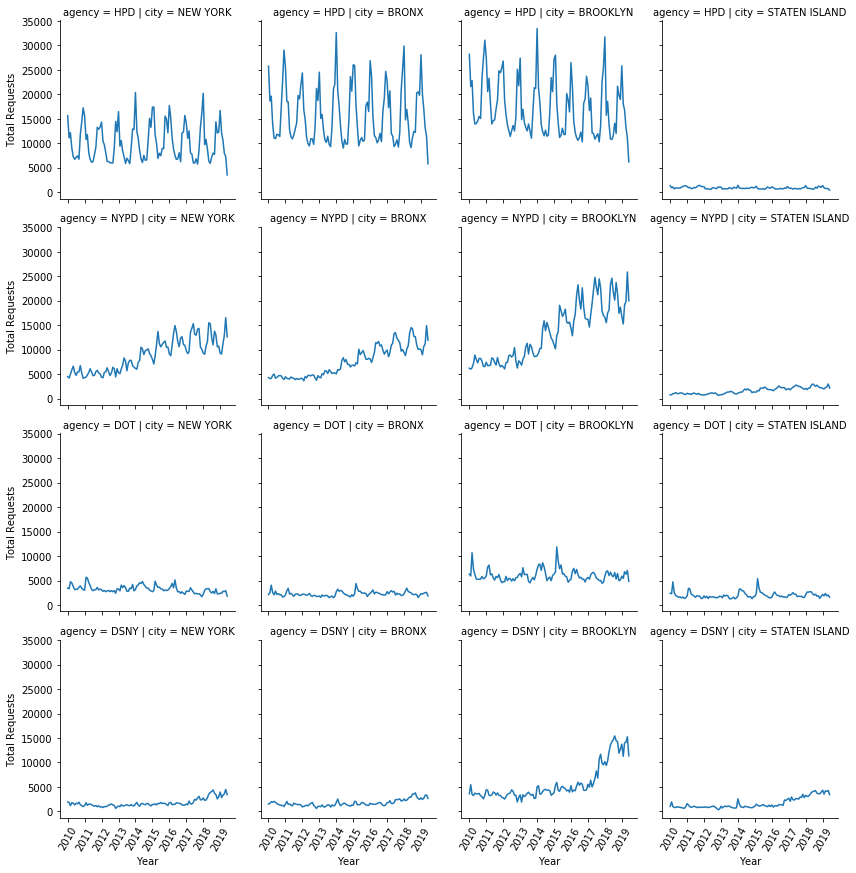

In [241]:
# set up facet grid
g = sns.FacetGrid(city_agency,
                 col = "city", row = 'agency') 
#
# Map lineplot onto the grid
g = g.map(sns.lineplot,
                 "month", 
                 "total_calls" )
#
# Rename axes
g = g.set_ylabels("Total Requests")
g = g.set_xlabels("Year")
g = g.set_xticklabels(labels = ["2009","2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"], rotation = 60)

### Some final thoughts

There is some interesting things to see here. 
- it looks like, with some noteable exceptions, agency and city are fairly independent.
- Most notable exception to the above is that it looks like Brooklyn is driving the growth in number of calls to the department of sanitation. Why is Brooklyn so dirty?
- What happened in 2015 in Staten Island with the Department of Transit?

As you have seen, using the group by and aggregate functions in SQL can allow you to make smart API calls to deal with truly massive data sets!